<a href="https://colab.research.google.com/github/lanyu0322/phd_semester1/blob/master/ggd_concessions_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install geopandas

     |████████████████████████████████| 921kB 4.9MB/s 
     |████████████████████████████████| 11.8MB 32.7MB/s 
     |████████████████████████████████| 10.1MB 34.9MB/s 


In [0]:
import numpy as np
import pandas as pd
import geopandas as gp

In [0]:
fname = "drive/My Drive/lwir/data/food_truck/DPR_Concessions_001.json"

In [0]:
# dpr_con = gp.read_file(fname)
dpr_con = pd.read_json(fname)

In [0]:
dpr_con

,name,location,park_id,permit_start_date,permit_end_date,permit_number,description,type,emails,phones,websites,locations
0,Alley Pond Golf Center,232-01 Northern Boulevard,Q001,2010-11-01,2025-10-31,Q1-DR,"Alley Pond Golf Center\r\n74 Hitting Stations,...",Driving Range,{'email': []},{'phone': ['(718) 225-9187']},{'website': []},"{'location': [{'lat': '40.765294', 'lng': '-73..."
1,Alley Pond Tennis Center,79-20 Winchester Boulevard,Q001,2010-11-16,2022-10-10,Q1-A-SB-IT,"The Alley Pond Tennis Center, operated by form...",Tennis Facility,{'email': ['info@alleypondtenniscenter.com']},{'phone': ['(718) 264-2600 ']},{'website': ['http://www.alleypondtenniscenter...,"{'location': [{'lat': '40.739339', 'lng': '-73..."
2,Arthur Kill Road Restaurant,Arthur Kill Road & Richmond Avenue,R013,None,None,R13-R,None,Restaurant,{'email': []},{'phone': []},{'website': []},"{'location': [{'lat': '40.561066', 'lng': '-74..."
3,Astoria Pool Snack Bar,Astoria Pool,Q004,2012-07-06,2020-09-06,Q4-SB,None,Snack Bar,{'email': ['surfshackny@yahoo.com']},{'phone': []},{'website': ['https://surfshackny.wix.com/surf...,"{'location': [{'lat': '40.779108', 'lng': '-73..."
4,Battery Gardens Restaurant,1 Battery Park Plaza,M005,2004-01-16,2020-01-07,M5-F-R,None,Restaurant,{'email': ['alex@batterygardens.com']},{'phone': ['(212) 809-5508']},{'website': ['http://www.batterygardens.com/']},"{'location': [{'lat': '40.701423', 'lng': '-74..."
...,...,...,...,...,...,...,...,...,...,...,...,...
103,War Memorial Ice Skating Rink,"Victory Boulevard, west of Clove Road",R005,2011-10-01,2026-09-30,"R5-A-IS,SB",None,Ice Skating Rink,{'email': []},{'phone': ['(718) 720-1010']},{'website': []},"{'location': [{'lat': '40.615824', 'lng': '-74..."
104,Wendy's,19 West 170th Street,X058,2005-11-01,2020-10-31,X58-R,Wendy's in Keltch Memorial Park is located on ...,Snack Bar,{'email': []},{'phone': ['(718) 681-0483']},{'website': []},"{'location': [{'lat': '40.840534', 'lng': '-73..."
105,Wollman & Lasker Ice Skating Rinks,Wollman Rink: Center Drive at 63rd Street; Las...,M010,2001-11-01,2021-04-30,M10-(5)-A-IS,None,Ice Skating Rink,{'email': ['dklied@trumporg.com']},{'phone': ['(212) 439-6900']},{'website': ['http://www.wollmanskatingrink.co...,"{'location': [{'lat': '40.767807', 'lng': '-73..."
106,World Ice Arena (Flushing Meadows Ice Skating ...,Flushing Meadows Park Perimeter Road between t...,Q099,2009-02-07,2029-02-06,Q99-IS,"Located in Flushing Meadows Corona Park, home ...",Ice Skating Rink,{'email': []},{'phone': ['(718) 760-9001']},{'website': ['http://worldice.pucksystems.com/']},"{'location': [{'lat': '40.751901', 'lng': '-73..."


In [0]:
parks = gp.read_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")

In [0]:
parks

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,gisobjid,gispropnum,global_id,jurisdicti,location,mapped,name311,nys_assemb,nys_senate,objectid,omppropid,parentid,permit,permitdist,permitpare,pip_ratabl,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
0,19440801000000.00000,0.991,None,M,PLGD,20100106000000.00000,111,9,M-11,Abraham Lincoln Playground,100004131.0,M193,{5D62AD38-AE30-4E43-8DE0-E28780CD8E3C},DPR,5 Ave. and E. 135 St.,False,Abraham Lincoln Playground,70,30,5834.0,M193,M-11,Y,M-11,M-11,Yes,25,False,Abraham Lincoln Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/M193/,13,No,10037,"POLYGON ((-73.93683 40.81185, -73.93684 40.811..."
1,None,0.030,None,Q,PARK,20090423000000.00000,413,23,Q-13,Father Reilly Square,100000216.0,Q159,{12B62C23-3F42-418E-B059-F0B549D7FCEB},DPR/CDOT,"Winchester Blvd., 93 Ave., 220 St.",False,Father Reilly Square,33,14,6166.0,Q159,Q-13,Y,Q-13,Q-13,Yes,105,False,Father Reilly Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/Q159/,5,No,11428,"POLYGON ((-73.73628 40.72268, -73.73609 40.722..."
2,19360824000000.00000,0.911,2300 Ryer Avenue,X,PARK,20100106000000.00000,205,15,X-05,Slattery Playground,100004208.0,X085,{01AD9F2D-AD1B-4FBE-BB15-41DC9DC485FD},DPR,E. 183 St. bet. Valentine Ave. and Ryer,False,Slattery Playground,86,33,4792.0,X085,X-05,Y,X-05,X-05,Yes,46,False,Slattery Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/X085/,15,No,10458,"POLYGON ((-73.89825 40.85693, -73.89894 40.857..."
3,19520206000000.00000,0.189,349 RODNEY STREET,B,PARK,20100106000000.00000,301,34,B-01,Rodney Playground Center,100003716.0,B223PD,{F14C1976-8BEC-49F1-A139-798EA720A52E},DPR,"Rodney St., S. 3 St., Borniquen Pl.",True,Rodney Playground Center,53,18,5124.0,B223PD,B-01,Y,B-01,B-01,Yes,90,False,Rodney Playground Center,Sitting Area/Triangle/Mall,Neighborhood Park,http://www.nycgovparks.org/parks/B223PD/,7,No,11211,"POLYGON ((-73.95533 40.71042, -73.95556 40.710..."
4,19240403000000.00000,0.554,124 11 STREET,B,PARK,20110712000000.00000,306,39,B-06,Ennis Playground,100004454.0,B095,{B2FA7ABF-7ECB-4847-8979-0DD773A819F8},DPR,"11 St., 12 St. bet. 2 Ave. and 3 Ave.",False,Ennis Playground,51,25,5456.0,B095,B-06,Y,B-06,B-06,Yes,78,False,Ennis Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B095/,7,No,11215,"POLYGON ((-73.99425 40.67058, -73.99385 40.671..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,20180806000000.00000,0.563,None,B,PARK,None,301,33,B-01,None,0.0,B595,{08A348D1-7A17-4A32-8668-F9241F93A539},DPR,Commercial St. bet. Franklin St. and Clay St.,None,None,50,18,76492.0,B595,None,None,None,None,No,None,False,Greenpoint Landing,None,Neighborhood Park,None,12,Yes,11222,"POLYGON ((-73.95929 40.73711, -73.95936 40.737..."
2007,18640615000000.00000,526.250,None,B,PARK,None,"306, 307, 314, 309, 308",39,B-19,Prospect Park,100004003.0,B073,{2E313F13-E826-45C6-8E10-C342CDE4D9A9},DPR,"Prospect Park W, Parkside Ave. bet. Flatbush A...",False,Prospect Park,44,21,69238.0,B073,B-19,Y,B-19,B-19,No,78,False,Prospect Park,Flagship Park,Flagship Park,http://www.nycgovparks.org/parks/B073/,9,No,11215,"POLYGON ((-73.96881 40.67189, -73.96867 40.671..."
2008,20050630000000.00000,0.096,114 WARREN STREET,M,PARK,20100106000000.00000,101,1,M-01,Tribeca Dog Run,100004227.0,M366,{EF9A8A19-2561-4549-8583-22EA08792D9F},DPR,Warren St. bet. Greenwich St. and West St.,False,Tribeca Dog Run,66,26,4749.0,M366,M-01,Y,M-01,M-01,No,1,False,Tribeca Dog Run,Neighborhood Park,Recreation Field/Courts,http://www.nycgovparks.org/parks/M366/,10,No,10007,"POLYGON ((-74.01217 40.71633, -74.01195 40.716..."
2009,20151231000000.00000,0.230,140 WEST 20 STREET,M,PARK,None,104,3,M-04,None,100024341.0,M402,{8BD009AF-5DB0-41D1-ABDF-83C9067D6AB1},DPR,W. 20 St. be

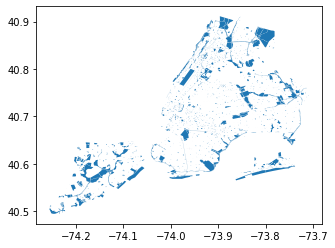

In [0]:
parks.plot()

In [0]:
parks["lon"] = parks["geometry"].centroid.x
parks["lat"] = parks["geometry"].centroid.y

In [0]:
dpr_con[dpr_con["park_id"].isin(parks["gispropnum"]) == False]

,name,location,park_id,permit_start_date,permit_end_date,permit_number,description,type,emails,phones,websites,locations
57,Major Deegan Expressway Gas Station,"Major Deegan Expressway (Northbound), near the...",M100,2008-07-01,2023-06-30,X150-A-GS,None,Gas Station,{'email': []},{'phone': []},{'website': []},"{'location': [{'lat': '40.895115', 'lng': '-73..."
58,Major Deegan Expressway Gas Station,"Major Deegan Expressway (Southbound), near the...",M100,2008-07-01,2023-06-30,X150-GS,None,Gas Station,{'email': []},{'phone': []},{'website': []},"{'location': [{'lat': '40.894928', 'lng': '-73..."


In [0]:
# -- GGD: we are losing to rows b/c M100 is not in the parks properties file
dpr_con = dpr_con.merge(parks[["gispropnum", "lon", "lat"]], left_on="park_id", right_on="gispropnum")

In [0]:
print(type(dpr_con["locations"].iloc[0]))

print(dpr_con["locations"].iloc[0])


<class 'dict'>
{'location': [{'lat': '40.765294', 'lng': '-73.749188'}]}


In [0]:
(dpr_con["locations"].apply(lambda x: len(x["location"])) > 1).sum()

7

In [0]:
lons = []
lats = []

import numpy as np

for ii in range(len(dpr_con)):
  rec = dpr_con["locations"].iloc[ii]
  lls = rec["location"]

  for jj in range(len(lls)):
    lons.append(-np.abs(float(lls[jj]["lng"])))
    lats.append(float(lls[jj]["lat"]))

lons = np.array(lons)
lats = np.array(lats)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dpr_eat = pd.read_json("drive/My Drive/lwir/data/food_truck/DPR_Eateries_001.json")

In [0]:
# -- GGD: we may be losing some for the same reason as above
dpr_eat = dpr_eat.merge(parks[["gispropnum", "lon", "lat"]], left_on="park_id", right_on="gispropnum")

In [0]:
dpr_eat

,name,location,park_id,start_date,end_date,description,permit_number,phone,website,type_name,gispropnum,lon,lat
0,Central Park Food Cart,At the entrance to the path leading to the Pon...,M010,2014-01-01,2018-12-31,None,M10-E61-ED-C,None,None,Food Cart,M010,-73.965558,40.782484
1,Central Park Food Cart,"Central Park Mall Area, northwest side of the ...",M010,2015-06-20,2019-12-31,None,M10-72-1A-C,None,None,Food Cart,M010,-73.965558,40.782484
2,Central Park Food Cart,"West 72 Street path, west of Daniel Webster",M010,2015-09-12,2019-12-31,None,M10-72-3-C,None,None,Food Cart,M010,-73.965558,40.782484
3,Central Park Food Cart,East Drive and 72 Street,M010,2015-06-27,2019-12-31,None,M10-72-ED-C,None,None,Food Cart,M010,-73.965558,40.782484
4,Central Park Food Cart,"West Drive, between West 74 and West 75 streets",M010,2015-04-30,2019-12-31,None,M10-74-WD-C,None,None,Food Cart,M010,-73.965558,40.782484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Adameric Cart,Western Border of Cobblestone Plaza,M007,2013-03-24,2018-03-23,None,M007-CG,None,None,Specialty Cart,M007,-74.013658,40.704945
228,Wafels & Dinges,Eastern Plaza of City Hall,M013,2012-08-29,2017-08-28,None,M13-CG,None,None,Specialty Cart,M013,-74.006157,40.712805
229,CC Moore Homestead Park Fruit and Vegetable Cart,"Broadway, between Elmhurst & Britton Ave.",Q361,2010-04-21,2014-12-31,None,Q361-GR,(212) 879-0244,None,Fruit & Vegetable Cart,Q361,-73.882397,40.742142
230,Owen Dolen Fruit and Vegetable Cart,"E. Tremont Ave., Westchester Ave., and Lane Ave.",X016,2011-09-07,2014-12-31,None,X16-GR,None,None,Fruit & Vegetable Cart,X016,-73.842865,40.840549


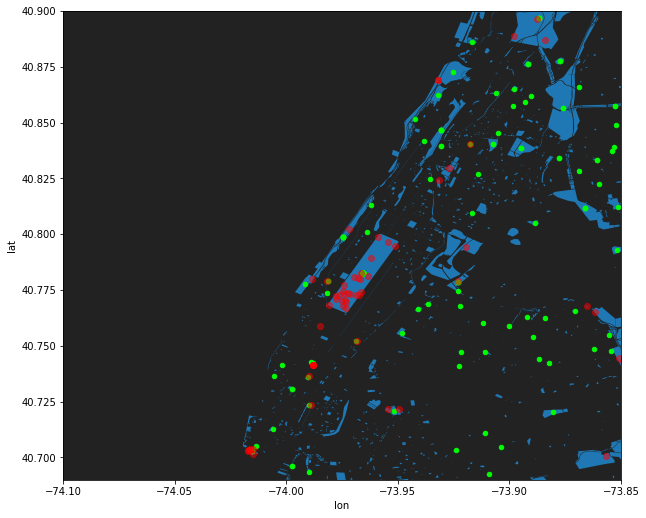

In [0]:
ax = parks.plot(figsize=(10, 10))
dpr_eat.plot.scatter("lon", "lat", c="lime", ax=ax)
ax.set_ylim(40.69, 40.9)
ax.set_xlim(-74.1, -73.85)
ax.plot(lons, lats, "o", color="red", alpha=0.5)
ax.set_facecolor("#222222")
# plt.plot(lons, lats, "o", color="red")

In [0]:
lats[lons > 0]

array([], dtype=float64)

In [0]:
import os
# -- read the data
food_name = os.path.join("drive", "My Drive", "lwir", "data", "food_truck", "DOHMH_New_York_City_Restaurant_Inspection_Results.csv")
restaurant = pd.read_csv(food_name, parse_dates=["INSPECTION DATE"])
restaurant.head()


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50014069,RED LOBSTER,Manhattan,261,W 125TH ST,10027.0,2122801930,Seafood,2018-03-26,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,23.0,NaN,NaN,11/26/2019,Cycle Inspection / Initial Inspection,40.809827,-73.950336,110.0,9.0,22200.0,1089941.0,1.019310e+09,MN11
1,50000419,NATUREWORKS,Manhattan,43-45,W 55 STREET,10019.0,2123333020,American,2019-08-05,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,37.0,NaN,NaN,11/26/2019,Cycle Inspection / Initial Inspection,40.762279,-73.976363,105.0,4.0,10400.0,1034820.0,1.012710e+09,MN17
2,50052197,TERRACE WEST,Brooklyn,3052-3078,W 21ST ST,11224.0,9173049069,American,2017-08-18,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,4.0,A,08/18/2017,11/26/2019,Pre-permit (Operational) / Initial Inspection,40.573493,-73.987441,313.0,47.0,35200.0,3189655.0,3.070710e+09,BK21
3,50063522,CECCONI'S,Brooklyn,55,WATER ST,11201.0,6462152136,Italian,2017-07-10,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,8.0,NaN,NaN,11/26/2019,Pre-permit (Operational) / Initial Inspection,40.703294,-73.992047,302.0,33.0,2100.0,3000019.0,3.000260e+09,BK38
4,50087131,VICTORIA G'S PIZZERIA,Queens,8905,METROPOLITAN AVE,11374.0,7186852250,Pizza,2019-05-28,Violations were cited in the following area(s).,16B,The original nutritional fact labels and/or in...,N,NaN,NaN,NaN,11/26/2019,Trans Fat / Initial Inspection,40.712156,-73.861772,405.0,30.0,63700.0,4437647.0,4.031760e+09,QN19


In [0]:
restaurant["BORO"].value_counts()

Manhattan        156019
Brooklyn         100985
Queens            90714
Bronx             35942
Staten Island     13179
0                   111
Name: BORO, dtype: int64

In [0]:
ind = (restaurant["INSPECTION DATE"] >= "2017-01-01") & \
  (restaurant["INSPECTION DATE"] < "2018-01-01") & \
  (restaurant["Latitude"] > 0.0) & \
  (restaurant["Longitude"] < 0.0) & \
  (restaurant["BORO"] == "Manhattan")
restaurant_sub = restaurant[ind]

(-74.0236338473228, -73.9085362361982, 40.691911245174644, 40.88194250885235)

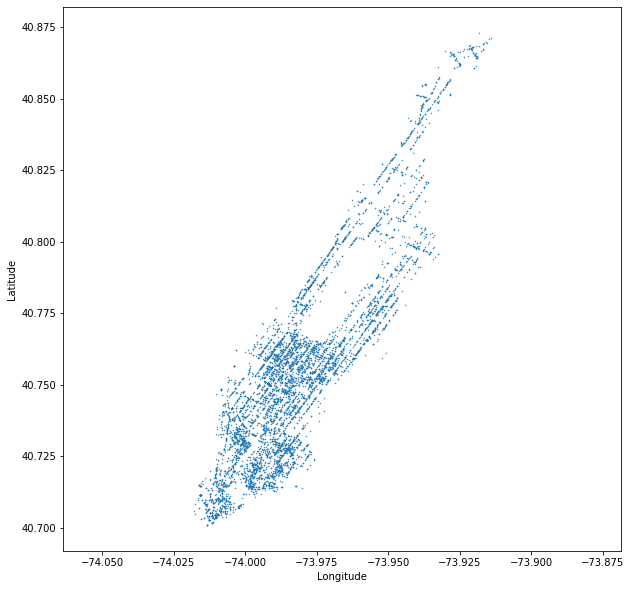

In [0]:
ax = restaurant_sub.groupby("CAMIS").first().plot.scatter("Longitude", "Latitude", s=0.2, figsize=[10, 10])
ax.axis("equal")

In [0]:
restaurant_sub.isna().sum(axis=0)

CAMIS                       0
DBA                         0
BORO                        0
BUILDING                    0
STREET                      0
ZIPCODE                     0
PHONE                       0
CUISINE DESCRIPTION         0
INSPECTION DATE             0
ACTION                      0
VIOLATION CODE             56
VIOLATION DESCRIPTION      99
CRITICAL FLAG              99
SCORE                     347
GRADE                    4627
GRADE DATE               4627
RECORD DATE                 0
INSPECTION TYPE             0
Latitude                    0
Longitude                   0
Community Board             0
Council District            0
Census Tract                0
BIN                        33
BBL                         0
NTA                         0
dtype: int64

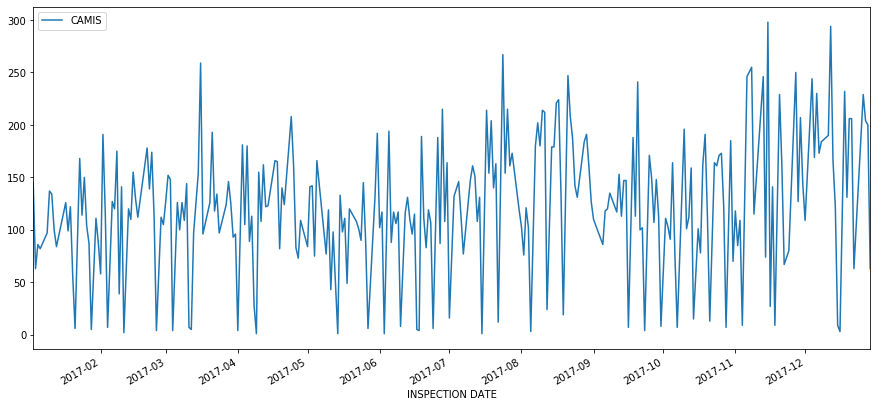

In [0]:
restaurant_sub.groupby("INSPECTION DATE").count().plot(y="CAMIS", use_index=True, figsize=[15, 7])

In [0]:
ind_2017 = restaurant["INSPECTION DATE"].str.contains("2017")
restaurant_2017 = restaurant[ind_2017]
ind_manhattant = restaurant["BORO"].str.contains("Manhattan")
restaurant_2017_manhattan = restaurant_2017[ind_manhattant]
print(restaurant_2017_manhattan)


           CAMIS                     DBA  ...           BBL   NTA
12      50001697      THE SWEET SHOP NYC  ...  1.014670e+09  MN31
14      40402717  THE WEBSTER APARTMENTS  ...  1.007320e+09  MN13
22      50001446   BENTO SUSHI & NOODLES  ...  1.013170e+09  MN19
32      40795021          TAO RESTAURANT  ...  1.012930e+09  MN17
38      41151989      WIMPY'S RESTAURANT  ...  1.021280e+09  MN36
...          ...                     ...  ...           ...   ...
396889  40389504              DALLAS BBQ  ...  1.014270e+09  MN31
396915  50005848                  IPPUDO  ...  1.005550e+09  MN22
396930  50058630             MADAME VO'S  ...  1.004510e+09  MN22
396942  41262775                 KELLY'S  ...  1.003978e+09  MN22
396948  50033289          CARLO'S BAKERY  ...  1.010320e+09  MN15

[34380 rows x 26 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [0]:
inspection_date_manhattan = restaurant_2017_manhattan.groupby("INSPECTION DATE").count()
print(inspection_date_manhattan)
ind_camera = inspection_date_manhattan.index
print("")
print(ind_camera)

                 CAMIS  DBA  BORO  BUILDING  ...  Census Tract  BIN  BBL  NTA
INSPECTION DATE                              ...                             
01/03/2017         145  145   145       145  ...           143  143  145  143
01/04/2017          63   63    63        63  ...            63   63   63   63
01/05/2017          86   86    86        86  ...            86   86   86   86
01/06/2017          82   82    82        82  ...            80   80   82   80
01/09/2017          97   97    97        97  ...            97   97   97   97
...                ...  ...   ...       ...  ...           ...  ...  ...  ...
12/22/2017          63   63    63        63  ...            63   63   63   63
12/26/2017         229  229   229       229  ...           226  226  229  226
12/27/2017         204  204   204       204  ...           195  195  204  195
12/28/2017         200  200   200       200  ...           199  199  200  199
12/29/2017          63   63    63        63  ...            63  

In [0]:
#subset restaurant in valid date
#june
temp_06_28 = restaurant_2017_manhattan["INSPECTION DATE"].str.contains("06/28/2017")
temp_06_29 = restaurant_2017_manhattan["INSPECTION DATE"].str.contains("06/29/2017")
temp_06_30 = restaurant_2017_manhattan["INSPECTION DATE"].str.contains("06/30/2017")

restaurant_2017_manhattan["month"] = [int(i[:2]) for i in restaurant_2017_manhattan["INSPECTION DATE"]]
# print(restaurant_2017_manhattan)
temp_07 = restaurant_2017_manhattan["month"] == 7
temp_08 = restaurant_2017_manhattan["month"] == 8
temp_09 = restaurant_2017_manhattan["month"] == 9
# print(temp_07)
temp_date_06_28 = restaurant_2017_manhattan[temp_06_28]
temp_date_06_29 = restaurant_2017_manhattan[temp_06_29]
temp_date_06_30 = restaurant_2017_manhattan[temp_06_30]
temp_july = restaurant_2017_manhattan[temp_07]
temp_aug = restaurant_2017_manhattan[temp_08]
temp_sept = restaurant_2017_manhattan[temp_09]
# print(temp_sept)
# print("")
# Sept date need further process
#temp_sept["day"] = [int(i[2:4]) for i in temp_sept["INSPECTION DATE"]] # not worked since invalid literal for int() with base 10: '09/1'
temp_sept["date"] = temp_sept["INSPECTION DATE"].str.replace("/","")
temp_sept["day"] = [int(i[2:4]) for i in temp_sept["date"]]
print(temp_sept)
temp_sept_day = temp_sept["day"] < 12
temp_sept_final = temp_sept[temp_sept_day]
print("")
print(temp_sept_final)


           CAMIS                            DBA  ...      date day
149     40849391                          ENNJU  ...  09142017  14
192     41480432                   GINO'S PIZZA  ...  09142017  14
649     50055163  KENNEDY FRIED CHICKEN & PIZZA  ...  09262017  26
694     50016050          SOPHIES CUBAN CUISINE  ...  09062017   6
790     50040532     INTERNATIONAL HOUSE DINING  ...  09212017  21
...          ...                            ...  ...       ...  ..
396371  40607926                BISTRO LES AMIS  ...  09282017  28
396523  41704391             NEW MANDARIN COURT  ...  09152017  15
396652  50069204                        CHARM'S  ...  09272017  27
396758  50009657               CASABLANCA GRILL  ...  09202017  20
396810  41465002              THE MEATBALL SHOP  ...  09122017  12

[2697 rows x 29 columns]

           CAMIS                              DBA  ...      date day
694     50016050            SOPHIES CUBAN CUISINE  ...  09062017   6
894     41542018               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [0]:
pd.set_option('display.max_columns', 100)
df1 = pd.DataFrame(temp_date_06_28)
df2 = pd.DataFrame(temp_date_06_29)
df3 = pd.DataFrame(temp_date_06_30)
df4 = pd.DataFrame(temp_july)
df5 = pd.DataFrame(temp_aug)
df6 = pd.DataFrame(temp_sept_final)
restaurant_camera_period = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, sort=True)

#print(restaurant_camera_period)

#  delete duplicated restaurant                          #就是restaurant_camera_period这个文件，camis是每个餐厅的独有代码，
camis = restaurant_camera_period.groupby(["CAMIS", "Longitude", "Latitude"]).count()
#print(camis)
# print("count of grouped camis {0}, while unique camis {1}".format(len(camis), len(np.unique(camis.reset_index()["CAMIS"])) ))
# restaurant_camera = restaurant_camera_period(camis)


In [0]:

camis = camis.reset_index()
# print(camis["Longitude"])
# print(camis["Latitude"])


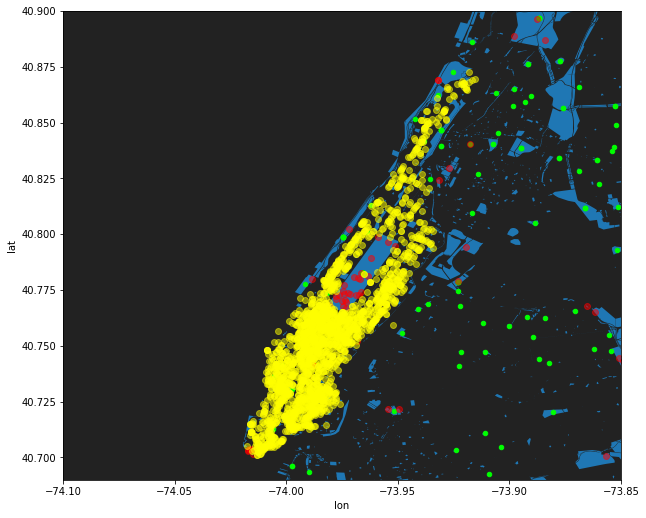

In [0]:
#plot 
# print(type(camis['Longitude']))
# camis['Longitude'] = camis['Longitude'].apply(lambda x: float(x))
# camis['Latitude'] = camis['Longitude'].apply(lambda x: float(x))
                                   #camis.plot.scatter 我画的时候总有问题，说camis['Longitude']和Latitude column里有些值是前后带有空格的，就比如 '          -73.22323', 这样geodataframe就没法画图，
                                  
                                   #这是由于pd.read_csv的时候可能原始的csv文件里就有这些空格或者换行, 没找到解决办法，我直接把他们转成普通的python list然后画了，
#camis.plot.scatter cannot use, it is saying camis['Longitude'] and Latitude column has space before or after the number
camis_lon = camis['Longitude'].to_list()
camis_lat = camis['Latitude'].to_list()

ax = parks.plot(figsize=(10, 10))
dpr_eat.plot.scatter("lon", "lat", c="lime", ax=ax)
ax.set_ylim(40.69, 40.9)
ax.set_xlim(-74.1, -73.85)
ax.plot(lons, lats, "o", color="red", alpha=0.5)
ax.plot(camis_lon, camis_lat, "o", color="yellow", alpha=0.5)
# camis.plot.scatter(camis_lon, camis_lat, c="yellow", s=2, alpha=0.5, ax=ax)  
ax.set_facecolor("#222222")
# plt.plot(lons, lats, "o", color="red")

In [0]:

# camera lat/lon transfer to NYS
lname = "drive/My Drive/lwir/data/nycdot/cams_latlon.npy"
latlon = np.load(lname)
# len(latlon) #281
import pyproj

def latlon_to_ny(lat, lon):
    """ lat/lon to NYS """

    proj = pyproj.Proj("epsg:2263", preserve_units=True)
    result = proj(lon, lat)

    return result

ny_lon, ny_lat = latlon_to_ny(latlon[:, 0], latlon[:, 1])
ny_latlon = np.vstack((ny_lat, ny_lon)).T

#print(ny_latlon)



In [0]:
import matplotlib.pyplot as plt


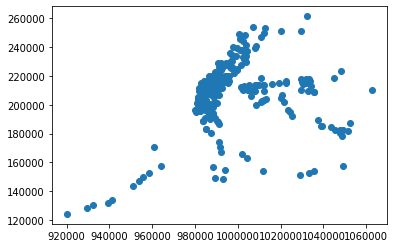

In [0]:
plt.scatter(ny_latlon[:, 1], ny_latlon[:, 0])

In [0]:

"""  define helper function """
def npoints(x0, y0, lat, lon):
  
  """ convert lat/lon to NY State Plane """
  ll_nyspd = pyproj.Proj("epsg:2263", preserve_units=True)(lon, lat)

  results = (((ll_nyspd[1] - x0)**2 + (ll_nyspd[0] - y0)**2) <= 250000).sum()

  return results

# counting the number of inspection restaurant

In [0]:
size = []

for i in range(len(ny_latlon)): 
  size_point = npoints(ny_latlon[i, 0], ny_latlon[i, 1], camis_lat, camis_lon)
  size.append(size_point)

print(size)
len(size)




[0, 0, 0, 15, 0, 0, 15, 0, 2, 0, 0, 3, 0, 2, 3, 0, 1, 0, 3, 3, 6, 11, 11, 15, 7, 9, 2, 1, 0, 0, 0, 1, 0, 4, 3, 3, 7, 0, 12, 2, 9, 19, 13, 12, 1, 3, 5, 4, 11, 4, 13, 10, 8, 10, 6, 0, 1, 1, 7, 0, 1, 13, 1, 0, 5, 0, 0, 0, 0, 7, 1, 1, 5, 0, 8, 7, 0, 0, 5, 5, 3, 0, 8, 14, 0, 0, 15, 25, 9, 5, 2, 10, 7, 13, 5, 2, 8, 0, 0, 5, 8, 7, 5, 10, 11, 7, 8, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 7, 0, 0, 11, 3, 4, 1, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 6, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 9, 9, 0, 4, 9, 8, 4, 3, 4, 6, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 0, 0, 7, 1, 0, 3, 6, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 1, 0, 0, 4, 7, 0, 13, 0, 5, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 4, 0, 0, 0]


281

# #counting the number of **Eateries** 

In [0]:
dpr_eat #Eateries

,name,location,park_id,start_date,end_date,description,permit_number,phone,website,type_name,gispropnum,lon,lat
0,Central Park Food Cart,At the entrance to the path leading to the Pon...,M010,2014-01-01,2018-12-31,None,M10-E61-ED-C,None,None,Food Cart,M010,-73.965558,40.782484
1,Central Park Food Cart,"Central Park Mall Area, northwest side of the ...",M010,2015-06-20,2019-12-31,None,M10-72-1A-C,None,None,Food Cart,M010,-73.965558,40.782484
2,Central Park Food Cart,"West 72 Street path, west of Daniel Webster",M010,2015-09-12,2019-12-31,None,M10-72-3-C,None,None,Food Cart,M010,-73.965558,40.782484
3,Central Park Food Cart,East Drive and 72 Street,M010,2015-06-27,2019-12-31,None,M10-72-ED-C,None,None,Food Cart,M010,-73.965558,40.782484
4,Central Park Food Cart,"West Drive, between West 74 and West 75 streets",M010,2015-04-30,2019-12-31,None,M10-74-WD-C,None,None,Food Cart,M010,-73.965558,40.782484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Adameric Cart,Western Border of Cobblestone Plaza,M007,2013-03-24,2018-03-23,None,M007-CG,None,None,Specialty Cart,M007,-74.013658,40.704945
228,Wafels & Dinges,Eastern Plaza of City Hall,M013,2012-08-29,2017-08-28,None,M13-CG,None,None,Specialty Cart,M013,-74.006157,40.712805
229,CC Moore Homestead Park Fruit and Vegetable Cart,"Broadway, between Elmhurst & Britton Ave.",Q361,2010-04-21,2014-12-31,None,Q361-GR,(212) 879-0244,None,Fruit & Vegetable Cart,Q361,-73.882397,40.742142
230,Owen Dolen Fruit and Vegetable Cart,"E. Tremont Ave., Westchester Ave., and Lane Ave.",X016,2011-09-07,2014-12-31,None,X16-GR,None,None,Fruit & Vegetable Cart,X016,-73.842865,40.840549


In [0]:
print(dpr_eat["lat"])
eat_lat = dpr_eat["lat"].to_list()
eat_lon = dpr_eat["lon"].to_list()

0      40.782484
1      40.782484
2      40.782484
3      40.782484
4      40.782484
         ...    
227    40.704945
228    40.712805
229    40.742142
230    40.840549
231    40.626458
Name: lat, Length: 232, dtype: float64


In [0]:
dpreat = []

for i in range(len(latlon)): #for in in range(len(latton))
  eat = npoints(ny_latlon[i, 0], ny_latlon[i, 1], eat_lat, eat_lon)
  dpreat.append(eat)

print(dpreat)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# counting the number of DPR_Concessions

In [0]:
lons = np.array(lons)
lats = np.array(lats)
#DPR_Concessions

concessions = []

for i in range(len(latlon)): #for in in range(len(latton))
  Concessions = npoints(ny_latlon[i, 0], ny_latlon[i, 1], lats, lons)
  concessions.append(Concessions)

print(concessions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


# Counting the number of sidewalk cafe

In [0]:
# -- read the data
fname = os.path.join("drive", "My Drive", "lwir", "data", "food_truck", "Sidewalk_Caf__Licenses_and_Applications.csv")
cafe = pd.read_csv(fname)
cafe.head()

,LICENSE_NBR,LIC_STATUS,BUSINESS_NAME,BUSINESS_NAME2,BUILDING,STREET,CITY,STATE,ZIP,SWC_TYPE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,DOHMH,LATITUDE,LONGITUDE,COMMUNITY_DISTRICT,CITY_COUNCIL_DISTRICT,CD_URL,APP_ID,APP_SWC_TYPE,APP_SQ_FT,APP_TABLES,APP_CHAIRS,APP_STATUS,APP_STATUS_DATE,EXPIRATION_DATE,APP_TOO_DATE,SUBMIT_DATE,INTAKE,INTAKE_DD,DPQA,SEND_PACKAGE_DD,CP,CP_DD,CB,CB_DD,HEARING,HEARING_DD,HEARING_PUBLIC,HEARING_PUBLIC_DD,CC,CC_DD,MOO,MOO_DD,ISSUANCE,ISSUANCE_DD
0,1190049-DCA,Active,HORSESHOES NY INC.,NaN,611,9TH AVE,NEW YORK,NY,10036,Unenclosed,91.0,4,8,41066767,40.759458,-73.992127,104,3,http://www.nyc.gov/mcb4,26094-2019-RSWC,Unenclosed,91.0,4,8,Pending Review,10/22/2019,01/22/2020,01/22/2020,08/29/2019,Ready For Review,08/29/2019,Issued Temp Op Letter,08/30/2019,Pending Review,08/30/2019,Review Period Expired,10/25/2019,Waived,10/25/2019,NaN,NaN,Pending Review,10/25/2019,Pending Review,NaN,Pending Review,NaN
1,2055726-DCA,Inactive,STARBUCKS CORPORATION,STARBUCKS COFFEE #48340,11,OLD FULTON ST,BROOKLYN,NY,11201,Unenclosed,153.0,6,12,50061502,40.702908,-73.993862,302,33,http://www.nyc.gov/html/bkncb2/html/home/home....,5918-2017-ASWC,Unenclosed,153.0,6,12,Application Review Completed,10/17/2017,09/15/2019,NaN,04/27/2017,Ready For Review,05/01/2017,Approved,05/01/2017,NaN,NaN,Recommend Approval,06/19/2017,Recommendation Issued,07/05/2017,SWC Public Hearing,06/21/2017,Review Period Expired,08/03/2017,NaN,NaN,Issued,10/17/2017
2,2071246-DCA,Active,JOANNIDES GROUP LLC,QUEEN'S ROOM,3602,DITMARS BLVD,ASTORIA,NY,11105,Unenclosed,473.0,16,32,50065639,40.774098,-73.908186,401,22,http://www.nyc.gov/html/qnscb1/html/home/home....,5396-2018-ASWC,Unenclosed,473.0,16,32,Application Review Completed,09/04/2018,09/15/2020,NaN,03/20/2018,Ready For Review,03/20/2018,Approved,03/22/2018,NaN,NaN,Review Period Expired,05/12/2018,Recommendation Issued,05/16/2018,SWC Public Hearing,05/09/2018,Review Period Expired,06/06/2018,Approved,09/04/2018,Issued,09/04/2018
3,2055194-DCA,Active,CRAFT LLC,CRAFT RESTAURANT,43,E 19TH ST,NEW YORK,NY,10003,Unenclosed,289.0,10,20,40873175,40.738173,-73.988998,105,2,http://www.cb5.org,6165-2017-ASWC,Unenclosed,289.0,10,20,Application Review Completed,08/07/2017,12/15/2019,NaN,05/02/2017,Ready For Review,05/02/2017,Approved,05/02/2017,NaN,NaN,Recommend Approval,06/19/2017,Recommendation Issued,06/30/2017,SWC Public Hearing,06/21/2017,Review Period Expired,07/21/2017,Approved,08/07/2017,Issued,08/07/2017
4,1468273-DCA,Active,DE ARMAS ENTERPRISES CORP.,COPPELIA,207,W 14TH ST,NEW YORK,NY,10011,Small Unenclosed,132.0,2,8,41577301,40.738964,-74.000090,104,3,http://www.nyc.gov/mcb4,26571-2019-RSWC,Small Unenclosed,132.0,2,8,Pending Review,09/16/2019,11/23/2019,11/23/2019,09/13/2019,Ready For Review,09/13/2019,Under Review,09/16/2019,Pending Review,09/16/2019,Review Period Expired,11/07/2019,Waived,11/07/2019,NaN,NaN,Pending Review,11/07/2019,Pending Review,NaN,Pending Review,NaN


In [0]:
cafe_no_nan = ~cafe["ISSUANCE_DD"].isna()
# cafe_mn = [cafe_no_nan["CITY"] == "NEW YORK"]
ind_cafe = cafe[cafe_no_nan]

#print(cafe_no_nan.groupby("CITY").count())


ind_cafe["date"] = ind_cafe["ISSUANCE_DD"].str.replace("/","")
ind_cafe["year"] = [int(i[4:8]) for i in ind_cafe["date"]]
# print(ind_cafe)
#print(ind_cafe.groupby("year").count()) #we will use 2016 and 2017 

#Frist, we are going to process 2016
ind_cafe_2016 = ind_cafe[ind_cafe["ISSUANCE_DD"].str.contains("2016")]

ind_cafe_2016["date_expir"] = ind_cafe_2016["EXPIRATION_DATE"].str.replace("/","")
ind_cafe_2016["year_expir"] = [int(i[4:8]) for i in ind_cafe_2016["date_expir"]]
# print(ind_cafe_2016.groupby("year_expir").count()) #2019
# print(ind_cafe_2016.groupby("LICENSE_NBR").count())
# len(ind_cafe_2016) # len=2


#we are going to process 2017 before sept
ind_cafe_2017 = ind_cafe[ind_cafe["ISSUANCE_DD"].str.contains("2017")]
ind_cafe_2017["month"] = [int(i[0:2]) for i in ind_cafe_2017["date"]]
#print(ind_cafe_2017["month"])
temp_ind_cafe_2017 = ind_cafe_2017[ind_cafe_2017["month"] < 9]
temp_ind_cafe_2017["date_expir"] = temp_ind_cafe_2017["EXPIRATION_DATE"].str.replace("/","")
temp_ind_cafe_2017["year_expir"] = [int(i[4:8]) for i in temp_ind_cafe_2017["date_expir"]]
#print(temp_ind_cafe_2017.groupby("year_expir").count()) #2018&2019
#print(temp_ind_cafe_2017.groupby("LICENSE_NBR").count()) #67
#len(temp_ind_cafe_2017) #67

#process 09/2017
ind_cafe_2017_sept = ind_cafe_2017[ind_cafe_2017["month"] == 9]
ind_cafe_2017_sept["day"] = [int(i[2:4]) for i in ind_cafe_2017_sept["date"]]
ind_cafe_2017_sept_temp = ind_cafe_2017_sept[ind_cafe_2017_sept["day"] <= 11]
ind_cafe_2017_sept_temp["date_expir"] = ind_cafe_2017_sept_temp["EXPIRATION_DATE"].str.replace("/","")
ind_cafe_2017_sept_temp["year_expir"] = [int(i[4:8]) for i in ind_cafe_2017_sept_temp["date_expir"]]
# print(ind_cafe_2017_sept_temp.groupby("year_expir").count()) #2019
#print(ind_cafe_2017_sept_temp.groupby("LICENSE_NBR").count()) #7
#len(ind_cafe_2017_sept_temp) #7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [0]:
#combine
df7 = pd.DataFrame(ind_cafe_2016)
df8 = pd.DataFrame(temp_ind_cafe_2017)
df9 = pd.DataFrame(ind_cafe_2017_sept_temp)
cafe_camera_period = pd.concat([df7, df8, df9], axis=0, sort=True)
cafe_lat = np.array(cafe_camera_period["LATITUDE"])
cafe_lon = np.array(cafe_camera_period["LONGITUDE"])

In [0]:
cafe_number = []

for i in range(len(ny_latlon)): 
  cafe_camer_number = npoints(ny_latlon[i, 0], ny_latlon[i, 1], cafe_lat , cafe_lon)
  cafe_number.append(cafe_camer_number)

print(cafe_number)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# NYC_Bench

In [0]:
benchs = gp.read_file("drive/My Drive/lwir/data/nyc_citybench/NYC_CityBench.shp")

In [0]:
benchs.head()

,OBJECTID_1,SiteID,BenchID,Category,Type,Installati,Address,Street,X_Street,Borough,ComDist,Bus_Route,geometry
0,1,2105.0,1568.0,General,backed,2016-02-25,200 Wallabout Street,Wallabout Street,Lee Avenue and Bedford Avenue,None,301,Not Applicable,POINT (996718.001 194270.353)
1,2,3045.0,1945.0,Municipal Facilities,backless,2016-04-16,330 Hudson Street,Hudson Street,Vandam Street and Charlton Street,None,102,M20,POINT (982224.305 204076.705)
2,3,3062.0,1973.0,General,backless,2016-05-25,82-66 Broadway,Broadway,45th Avenue and Whitney Avenue,None,404,Q53,POINT (1017256.878 209504.927)
3,4,3091.0,1804.0,Bus Route,backless,2016-06-01,Holcombe Rucker Park,Frederick Douglass Boulevard,W. 155th Street and Harlem River Drive,None,110,M10,POINT (1001603.227 241406.683)
4,5,3150.0,2346.0,AAR,backed,2016-04-13,25 Fanning Street,Fanning Street,S Gannon Avenue & Westwood Avenue,None,502,Not Applicable,POINT (950106.743 160915.661)


In [0]:
bench_temp = benchs.groupby("Installati").sum()
bench_temp

ind_thi = benchs["Installati"] <= "2017-09-11"
benches_number = benchs[ind_thi]
# len(benches_number)#1602
# len(benchs) #1602

# bench_id = benchs.groupby("BenchID").count()
# len(bench_id) #1387

def convert_to_nyc(data):
  if (data.geometry.crs["init"] != "epsg:2263"):
    data.geometry = data.geometry.to_crs(epsg=2263)

In [0]:
convert_to_nyc(benches_number)
# print(benches_number)
geometry = benches_number["geometry"]
print(geometry[i])

POINT (1048227.052479923 184523.5115802586)


In [0]:
"""  define helper function """
def npoints_bench(x0, y0, lat, lon):
  

  results = (((lat - x0)**2 + (lon - y0)**2) <= 100).sum()

  return results